In [1]:
from py4j.java_gateway import JavaGateway
from py4j.java_collections import SetConverter, MapConverter, ListConverter
import matplotlib.pyplot as plt

In [2]:
gateway = JavaGateway()

print ("load data ...")
# read infrastructure, rollingstocks and timetable data
operation_entry = gateway.createOperationalSimulationEntry("c:\\temp\\raildata\\infrastructure",
    "c:\\temp\\raildata\\rollingstocks",
    "c:\\temp\\raildata\\timetable")

print ("data loaded.")

load data ...
data loaded.


In [3]:
# the simulation period will be set from 7:00 to 8:00
# the time is calulated as the total seconds starting from 0. E.g. for 7:00 am, the time is 7*3600 = 25200

start_time = 25200
end_time = 28800

print("run timetable simulation without disturbances ...")

def print_delays(log, sim_trips, prefix=''):
    for trip in sim_trips:
        print(trip.getNumber())
        arrive_delays = log.getDelays(trip.getNumber(), 1)
        departure_delays = log.getDelays(trip.getNumber(), 2)
        print(prefix + ' arrive delay   : ' + ' s, '.join([str(elem.getTotalSeconds()) for elem in arrive_delays]))
        print(prefix + ' departure delay: ' + ' s, '.join([str(elem.getTotalSeconds()) for elem in departure_delays]))

# The original timetable is not conflict-free.
# The delay_no_disturbances are the delays caused by the conflict without considering random disturbances.

trips = operation_entry.getUtilities().getTrips(start_time, end_time)
delay_no_disturbances = operation_entry.simulateWithoutDisturbances(start_time, end_time)
print_delays(delay_no_disturbances, trips, prefix="TS")

run timetable simulation without disturbances ...
34604
TS arrive delay   : 0.0 s, -27.977 s, -25.042 s, -25.174
TS departure delay: 0.0 s, -27.977 s, -25.042 s, -25.174
34603
TS arrive delay   : 0.0 s, 0.538 s, -0.743 s, -55.685
TS departure delay: 0.0 s, 0.538 s, -0.743 s, -55.685
82815_1
TS arrive delay   : 0.0 s, 20.554 s, -91.559
TS departure delay: 0.0 s, 20.554 s, -91.559
40010
TS arrive delay   : -10.5 s, 44.252 s, 79.825 s, 88.342 s, 92.914 s, 94.202
TS departure delay: -10.5 s, 44.252 s, 79.825 s, 88.342 s, 92.914 s, 94.202
40009
TS arrive delay   : -10.5 s, 51.236 s, 71.12 s, 61.418 s, 55.83 s, 40.65 s, 48.21 s, 54.942 s, 103.118
TS departure delay: -10.5 s, 51.236 s, 71.12 s, 61.418 s, 55.83 s, 40.65 s, 48.21 s, 54.942 s, 103.118
1278
TS arrive delay   : 0.0 s, -35.344 s, -51.71
TS departure delay: 0.0 s, -35.344 s, -51.71
51122
TS arrive delay   : 0.0 s, -11.312
TS departure delay: 0.0 s, -11.312
14854
TS arrive delay   : -10.5 s, 23.895 s, 24.996 s, 7.461
TS departure del

TS arrive delay   : -10.5 s, 9.13 s, 10.901 s, 8.296 s, 4.199 s, 4.121 s, 3.238 s, 1.503 s, -1.841 s, -25.025 s, -48.784 s, -54.101 s, -58.779 s, -62.189 s, -76.614
TS departure delay: -10.5 s, 9.13 s, 10.901 s, 8.296 s, 4.199 s, 4.121 s, 3.238 s, 1.503 s, -1.841 s, -25.025 s, -48.784 s, -54.101 s, -58.779 s, -62.189 s, -76.614
34531
TS arrive delay   : 0.0 s, -10.727 s, -17.786 s, -40.539 s, -39.846 s, -77.882 s, -92.174 s, -97.974 s, -87.037 s, -83.844 s, -83.707 s, -83.391 s, -83.836 s, -83.251 s, -74.895
TS departure delay: 0.0 s, -10.727 s, -17.786 s, -40.539 s, -39.846 s, -77.882 s, -92.174 s, -97.974 s, -87.037 s, -83.844 s, -83.707 s, -83.391 s, -83.836 s, -83.251 s, -74.895
34530
TS arrive delay   : -10.5 s, 9.194 s, 11.073 s, 8.616 s, 4.852 s, 4.802 s, 3.819 s, 2.977 s, -0.246 s, -23.51 s, -47.359 s, -52.666 s, -57.64 s, -61.08 s, -75.635
TS departure delay: -10.5 s, 9.194 s, 11.073 s, 8.616 s, 4.852 s, 4.802 s, 3.819 s, 2.977 s, -0.246 s, -23.51 s, -47.359 s, -52.666 s, -57.

In [4]:
disturbances = []

# Supported distribution and parameters are distributions defined in:
#     org.apache.commons.math3.distribution.AbstractRealDistribution

# BetaDistribution("BetaDistribution"), // alpha, beta
# CauchyDistribution("CauchyDistribution"), // median, scale
# ChiSquaredDistribution("ChiSquaredDistribution"), // degreesOfFreedom
# ConstantRealDistribution("ConstantRealDistribution"), // value
# ExponentialDistribution("ExponentialDistribution"), // mean
# FDistribution("FDistribution"), // numeratorDegreesOfFreedom, denominatorDegreesOfFreedom
# GammaDistribution("GammaDistribution"), // shape, scale
# GumbelDistribution("GumbelDistribution"), // mu, beta
# LaplaceDistribution("LaplaceDistribution"), // mu, beta
# LevyDistribution("LevyDistribution"), // mu, c
# LogisticDistribution("LogisticDistribution"), // mu, s
# LogNormalDistribution("LogNormalDistribution"), // scale, shape
# NakagamiDistribution("NakagamiDistribution"), // mu, omega
# NormalDistribution("NormalDistribution"), // mean, sd
# ParetoDistribution("ParetoDistribution"), // scale, shape
# TDistribution("TDistribution"), // degreesOfFreedom
# TriangularDistribution("TriangularDistribution"), // a, c, b
# UniformRealDistribution("UniformRealDistribution"), // lower, upper
# WeibullDistribution("WeibullDistribution"); // alpha, beta

parameters = ListConverter().convert([15.0], gateway._gateway_client) # mean value of disturbance
distribution = operation_entry.createExpDist("ExponentialDistribution", parameters)
train_classes = operation_entry.getUtilities().getAllTrainClasses()
train_class_groups = operation_entry.buildTrainClassGroups(train_classes)

for train_class_group in train_class_groups:
    station = operation_entry.getAllStations()[0]
    disturbance = operation_entry.createDisturbanceDefinition(2, distribution, train_class_group, station)
    disturbances.append(disturbance)

In [5]:
dist_conv = ListConverter().convert(disturbances, gateway._gateway_client)

print("run operational simulation with disturbances ...")

size = 3
delays_with_disturbances = operation_entry.simulate(dist_conv, size, start_time, end_time)

# output the random disturbances
for round in range(size):
    disturnbances_single_sim = operation_entry.getDisturbances(round)
    for trip in trips:
        dist_map = disturnbances_single_sim.getDisturbanceMapByTrip(trip)
        if dist_map is not None:
            for type in dist_map:
                print(type)
                item = dist_map[type]
                print(', '.join([str(key) + ":" + str(item[key]) for key in item]))

run operational simulation with disturbances ...
RUNNINGTIME_EXTENSION
0:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=0, duration=Duration [Seconds=35.767], disturbanceIndex=0]
RUNNINGTIME_EXTENSION
0:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=0, duration=Duration [Seconds=15.799], disturbanceIndex=0]
RUNNINGTIME_EXTENSION
9:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=9, duration=Duration [Seconds=32.194], disturbanceIndex=0]
RUNNINGTIME_EXTENSION
3:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=3, duration=Duration [Seconds=3.032], disturbanceIndex=0]
RUNNINGTIME_EXTENSION
3:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=3, duration=Duration [Seconds=56.492], disturbanceIndex=0]
RUNNINGTIME_EXTENSION
0:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=0, duration=Duration [Seconds=5.977], disturbanceIndex=0]
RUNNINGTIME_EXTENSION
5:Disturbance

RUNNINGTIME_EXTENSION
5:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=5, duration=Duration [Seconds=67.034], disturbanceIndex=1]
RUNNINGTIME_EXTENSION
0:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=0, duration=Duration [Seconds=2.156], disturbanceIndex=1]
RUNNINGTIME_EXTENSION
9:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=9, duration=Duration [Seconds=27.522], disturbanceIndex=1]
RUNNINGTIME_EXTENSION
5:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=5, duration=Duration [Seconds=2.405], disturbanceIndex=1]
RUNNINGTIME_EXTENSION
9:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=9, duration=Duration [Seconds=14.453], disturbanceIndex=1]
RUNNINGTIME_EXTENSION
5:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStationIndex=5, duration=Duration [Seconds=7.597], disturbanceIndex=1]
RUNNINGTIME_EXTENSION
0:Disturbance [distrubanceType=RUNNINGTIME_EXTENSION, startStat

In [6]:
# the results of simulation can be customized by user

# 10. Departure Delay
# 13. Arrive Delay

# The delay can be the delays with disturbance through OS, or the delay comparison between OS and TS

round = 1
for delay_with_disturbances in delays_with_disturbances:
    print("Round: " + str(round))

    if delay_with_disturbances is not None:
        delay_log = delay_with_disturbances.getComparedDelayLogger(delay_no_disturbances)

        print_delays(delay_with_disturbances, trips, prefix="OS") # absolute value of delays
        print_delays(delay_log, trips, prefix="COMPARE") # compare to without disturbances

    round = round + 1

Round: 1
34604
OS arrive delay   : 0.0 s, -8.388 s, 4.015 s, 3.429
OS departure delay: 0.0 s, -8.388 s, 4.015 s, 3.429
34603
OS arrive delay   : 0.0 s, 0.538 s, -0.743 s, -55.685
OS departure delay: 0.0 s, 0.538 s, -0.743 s, -55.685
82815_1
OS arrive delay   : 0.0 s, 20.554 s, -91.559
OS departure delay: 0.0 s, 20.554 s, -91.559
40010
OS arrive delay   : -10.5 s, 44.252 s, 79.825 s, 88.342 s, 92.914 s, 94.202
OS departure delay: -10.5 s, 44.252 s, 79.825 s, 88.342 s, 92.914 s, 94.202
40009
OS arrive delay   : -10.5 s, 51.236 s, 71.12 s, 61.418 s, 55.83 s, 40.65 s, 48.21 s, 54.942 s, 103.118
OS departure delay: -10.5 s, 51.236 s, 71.12 s, 61.418 s, 55.83 s, 40.65 s, 48.21 s, 54.942 s, 103.118
1278
OS arrive delay   : 0.0 s, -13.379 s, -24.058
OS departure delay: 0.0 s, -13.379 s, -24.058
51122
OS arrive delay   : 0.0 s, -11.312
OS departure delay: 0.0 s, -11.312
14854
OS arrive delay   : -10.5 s, 23.895 s, 24.996 s, 7.461
OS departure delay: -10.5 s, 23.895 s, 24.996 s, 7.461
43161
OS a

OS departure delay: 0.0 s, -3.711 s, -2.865 s, 0.91 s, 4.531 s, 4.992
541
OS arrive delay   : 0.0 s, 58.346 s, 65.262 s, 69.495 s, 72.483 s, 46.132 s, -1.404 s, -0.604 s, 21.122
OS departure delay: 0.0 s, 58.346 s, 65.262 s, 69.495 s, 72.483 s, 46.132 s, -1.404 s, -0.604 s, 21.122
43017
OS arrive delay   : 0.0 s, 72.211 s, 74.019 s, 103.819 s, 117.339 s, 146.795 s, 157.2 s, 167.378 s, 154.799 s, 161.495 s, 172.791 s, 180.579 s, 195.547 s, 200.306 s, 221.43
OS departure delay: 0.0 s, 72.211 s, 74.019 s, 103.819 s, 117.339 s, 146.795 s, 157.2 s, 167.378 s, 154.799 s, 161.495 s, 172.791 s, 180.579 s, 195.547 s, 200.306 s, 221.43
34304
OS arrive delay   : 0.0 s, -13.005 s, -15.814 s, -120.862
OS departure delay: 0.0 s, -13.005 s, -15.814 s, -120.862
34307
OS arrive delay   : 0.0 s, -52.171 s, -46.093 s, -63.21
OS departure delay: 0.0 s, -52.171 s, -46.093 s, -63.21
14705
OS arrive delay   : -10.5 s, 21.351 s, 21.59 s, 31.477 s, 31.442 s, 9.394
OS departure delay: -10.5 s, 21.351 s, 21.59 s

COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
51577
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
34113
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
34112
COMPARE arrive delay   : 0.0 s, 4.659 s, 4.659 s, 4.659 s, 4.659 s, 4.659
COMPARE departure delay: 0.0 s, 4.659 s, 4.659 s, 4.659 s, 4.659 s, 4.659
63912
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
1743
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 11.969 s, 16.166 s, 18.437
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 11.969 s, 16.166 s, 18.437
71_1
COMPARE arrive delay 

14854
OS arrive delay   : -10.5 s, 23.895 s, 24.996 s, 7.461
OS departure delay: -10.5 s, 23.895 s, 24.996 s, 7.461
43161
OS arrive delay   : 0.0 s, 37.929 s, 20.427
OS departure delay: 0.0 s, 37.929 s, 20.427
34208
OS arrive delay   : 0.0 s, -0.426 s, -0.265 s, -0.31 s, -5.023 s, -4.847 s, -5.291 s, 2.856 s, -1.368 s, -51.632 s, -72.566 s, -71.873 s, -110.279 s, -122.755 s, -129.756
OS departure delay: 0.0 s, -0.426 s, -0.265 s, -0.31 s, -5.023 s, -4.847 s, -5.291 s, 2.856 s, -1.368 s, -51.632 s, -72.566 s, -71.873 s, -110.279 s, -122.755 s, -129.756
1091
OS arrive delay   : 2.677 s, 17.789 s, -2.552
OS departure delay: 2.677 s, 17.789 s, -2.552
2182
OS arrive delay   : 0.0 s, 38.237 s, 43.204 s, 259.97 s, 225.891 s, 208.83
OS departure delay: 0.0 s, 38.237 s, 43.204 s, 259.97 s, 225.891 s, 208.83
14843
OS arrive delay   : -10.5 s, 28.582 s, 34.425 s, 24.231 s, 11.965 s, -22.893
OS departure delay: -10.5 s, 28.582 s, 34.425 s, 24.231 s, 11.965 s, -22.893
34414
OS arrive delay   : 0.0 

OS departure delay: -10.5 s, 9.13 s, 10.901 s, 8.296 s, 4.199 s, 4.121 s, 3.238 s, 1.503 s, -1.841 s, -25.025 s, -18.225 s, -23.542 s, -28.22 s, -31.63 s, -46.055
34531
OS arrive delay   : 0.0 s, -10.727 s, -17.786 s, -40.539 s, -39.846 s, -77.882 s, -86.859 s, -92.659 s, -81.722 s, -78.529 s, -78.392 s, -78.076 s, -78.521 s, -77.936 s, -69.58
OS departure delay: 0.0 s, -10.727 s, -17.786 s, -40.539 s, -39.846 s, -77.882 s, -86.859 s, -92.659 s, -81.722 s, -78.529 s, -78.392 s, -78.076 s, -78.521 s, -77.936 s, -69.58
34530
OS arrive delay   : -10.5 s, 9.194 s, 11.073 s, 8.616 s, 4.852 s, 4.802 s, 3.819 s, 2.977 s, -0.246 s, -23.51 s, -32.666 s, -37.974 s, -42.948 s, -46.388 s, -60.943
OS departure delay: -10.5 s, 9.194 s, 11.073 s, 8.616 s, 4.852 s, 4.802 s, 3.819 s, 2.977 s, -0.246 s, -23.51 s, -32.666 s, -37.974 s, -42.948 s, -46.388 s, -60.943
34529
OS arrive delay   : 0.0 s, -6.907 s, -11.934 s, -33.818 s, -33.125 s, -71.333 s, -75.972 s, -82.042 s, -75.76 s, -72.421 s, -72.427 s, 

COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 30.727 s, 30.727 s, 30.727 s, 30.727 s, 30.727 s, 30.727 s, 30.727 s, 30.727 s, 30.727
4873
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 7.439 s, 10.562 s, 12.15
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 7.439 s, 10.562 s, 12.15
946
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.213 s, 0.212 s, 0.212 s, 0.212 s, 0.213
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.213 s, 0.212 s, 0.212 s, 0.212 s, 0.213
14091
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
82865
COMPARE arrive delay   : 0.0 s, 40.943 s, 43.24 s, 43.241
COMPARE departure delay: 0.0 s, 40.943 s, 43.24 s, 43.241
82866
COMPARE arrive delay   : 0.0 s, 7.575 s, 10.529
COMPARE departure delay: 0.0 s, 7.575 s, 10.529
4405
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
COMPARE departure delay: 0.0 s, 0.0 

OS departure delay: 0.0 s, 6.613 s, 29.34 s, 28.458 s, 36.623 s, 48.797 s, 55.279 s, 70.777 s, 80.951 s, 103.236 s, 113.664 s, 121.036 s, 123.07 s, 123.31
53715
OS arrive delay   : 0.0 s, 488.659 s, 504.176 s, 522.336 s, 558.026 s, 556.806 s, 539.767
OS departure delay: 0.0 s, 488.659 s, 504.176 s, 522.336 s, 558.026 s, 556.806 s, 539.767
34163
OS arrive delay   : 0.0 s, 4.222 s, -1.848 s, 5.434 s, 9.773 s, 4.767 s, -10.424 s, -15.488 s, -16.308 s, -27.384
OS departure delay: 0.0 s, 4.222 s, -1.848 s, 5.434 s, 9.773 s, 4.767 s, -10.424 s, -15.488 s, -16.308 s, -27.384
34162
OS arrive delay   : 0.0 s, -0.426 s, -0.265 s, -0.31 s, -6.023 s, -5.847 s, -6.291 s, 0.539 s, -3.684 s, -53.948
OS departure delay: 0.0 s, -0.426 s, -0.265 s, -0.31 s, -6.023 s, -5.847 s, -6.291 s, 0.539 s, -3.684 s, -53.948
60012
OS arrive delay   : -10.5 s, 77.251 s, 95.4 s, 87.855 s, 57.829 s, 55.486 s, 43.567 s, 22.872 s, -1.293 s, -2.123 s, 1.516 s, 3.36 s, 26.98 s, 21.046 s, 13.633 s, 24.049
OS departure dela

3600
OS arrive delay   : -10.5 s, -0.006 s, 13.456 s, 740.032
OS departure delay: -10.5 s, -0.006 s, 13.456 s, 740.032
14002
OS arrive delay   : 0.0 s, 33.754 s, 34.801 s, -29.583
OS departure delay: 0.0 s, 33.754 s, 34.801 s, -29.583
60107
OS arrive delay   : -10.5 s, 61.702 s, 84.223 s, 78.461 s, 94.244 s, 121.425 s, 137.931 s, 143.218 s, 148.105 s, 149.761 s, 165.481 s, 181.853 s, 209.516 s, 198.188 s, 205.726 s, 204.519 s, 199.173
OS departure delay: -10.5 s, 61.702 s, 84.223 s, 78.461 s, 94.244 s, 121.425 s, 137.931 s, 143.218 s, 148.105 s, 149.761 s, 165.481 s, 181.853 s, 209.516 s, 198.188 s, 205.726 s, 204.519 s, 199.173
51632
OS arrive delay   : -10.5 s, 64.013 s, 65.313 s, 42.748 s, 26.447 s, -12.337 s, -30.799 s, -53.012 s, -55.707 s, -45.24 s, -12.692 s, 1.58 s, 4.866 s, 13.277 s, 18.309 s, 24.938 s, 36.396
OS departure delay: -10.5 s, 64.013 s, 65.313 s, 42.748 s, 26.447 s, -12.337 s, -30.799 s, -53.012 s, -55.707 s, -45.24 s, -12.692 s, 1.58 s, 4.866 s, 13.277 s, 18.309 s

COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 8.734 s, 12.404 s, 12.265 s, 12.264 s, 12.265
988
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 6.711 s, 8.192
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 6.711 s, 8.192
2277
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.043 s, 0.043 s, 0.044
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.043 s, 0.043 s, 0.044
14714
COMPARE arrive delay   : 0.0 s, 1.41 s, 1.715 s, 6.637 s, 6.637 s, 6.637
COMPARE departure delay: 0.0 s, 1.41 s, 1.715 s, 6.637 s, 6.637 s, 6.637
541
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 5.946 s, 8.455 s, 9.922
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 5.946 s, 8.455 s, 9.922
43017
COMPARE arrive delay   : 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
COMPARE departure delay: 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0 s, 0.0
34304
COMPARE arri

Duration [Seconds=15,030.117]
Train number:  34604


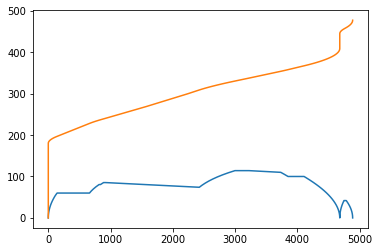

Duration [Seconds=15,031.857]
Train number:  34604


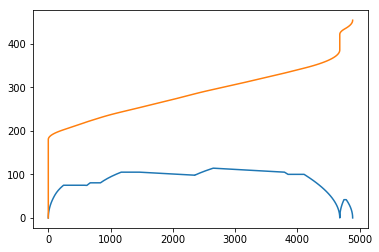

Duration [Seconds=14,992.863]
Train number:  34604


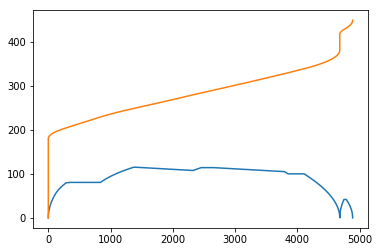

In [7]:
for r in range(size):
    simulator = operation_entry.getMultipleSimulator().getSingleSimulator(r)
    print(simulator.getDispatchingSystem().getTotalPending()) # 16. Actual waiting time (pending time)
    
    # 25. Velocity (Actual running trajectory with disturbances)
    # the running dynamics including position, time, velocity can be retrieved for each train_simulator, see also TS[6]
    
    for train_simulator in simulator.getTrainSimulators():
        print("Train number: ", train_simulator.getTrain().getNumber())
        # inside a course there are many DiscretePoint, which describes running dynamics
        course = train_simulator.getWholeCoursePoints()

        distances = []
        velocities = []
        times = []
        meter = 0
        time = 0

        for point in course:
            meter += point.getDistance().getMeter()
            time += point.getDuration().getTotalSeconds()
            distances.append(meter);
            times.append(time)
            velocities.append(point.getVelocity().getKilometerPerHour())

        plt.plot(distances, velocities) # 22. 24. Location of the train (from start station) and Velocity(Scheduled running trajectory)
        plt.plot(distances, times)
        plt.show()
    
        break # only print the first one